<a href="https://colab.research.google.com/github/VishweshChaubey/Codesoft/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [ ]:
churn_modelling= pd.read_csv('/content/telecom_churn.csv')
churn_modelling.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
churn_modelling.tail() # Use the correct DataFrame variable name

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [ ]:
churn_modelling.info() # Use the correct DataFrame variable name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
churn_modelling.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
churn_modelling.shape

(3333, 11)

In [ ]:
churn_modelling.size

36663

In [ ]:
churn_modelling.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [ ]:
churn_modelling.duplicated().sum()

0

In [ ]:
churn_modelling.nunique()

,0
Churn,2
AccountWeeks,212
ContractRenewal,2
DataPlan,2
DataUsage,174
CustServCalls,10
DayMins,1667
DayCalls,119
MonthlyCharge,627
OverageFee,1024


In [ ]:
churn_modelling.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
churn_modelling.axes

[RangeIndex(start=0, stop=3333, step=1),
 Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
        'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
        'RoamMins'],
       dtype='object')]

In [ ]:
churn_modelling.iloc[0]

,0
Churn,0.00
AccountWeeks,128.00
ContractRenewal,1.00
DataPlan,1.00
DataUsage,2.70
CustServCalls,1.00
DayMins,265.10
DayCalls,110.00
MonthlyCharge,89.00
OverageFee,9.87


In [ ]:
churn_modelling.loc[:, "MonthlyCharge"]

,MonthlyCharge
0,89.0
1,82.0
2,52.0
3,57.0
4,41.0
...,...
3328,71.7
3329,56.4
3330,56.0
3331,50.0


Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


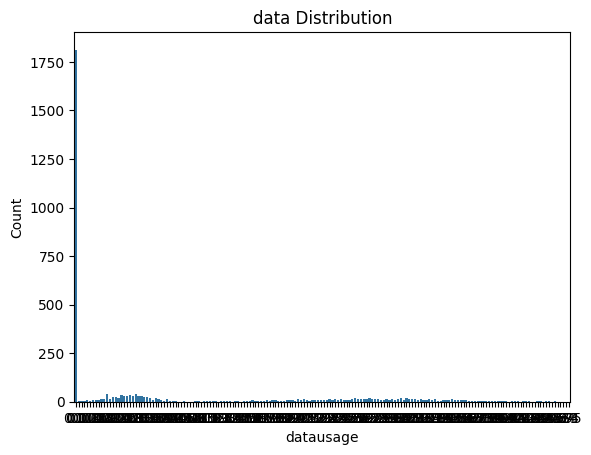

In [ ]:

print(churn_modelling.columns)


sns.countplot(x='DataUsage', data=churn_modelling)
plt.xlabel('datausage') # Adjust based on the actual column name
plt.ylabel('Count')
plt.title('data Distribution')
plt.show()





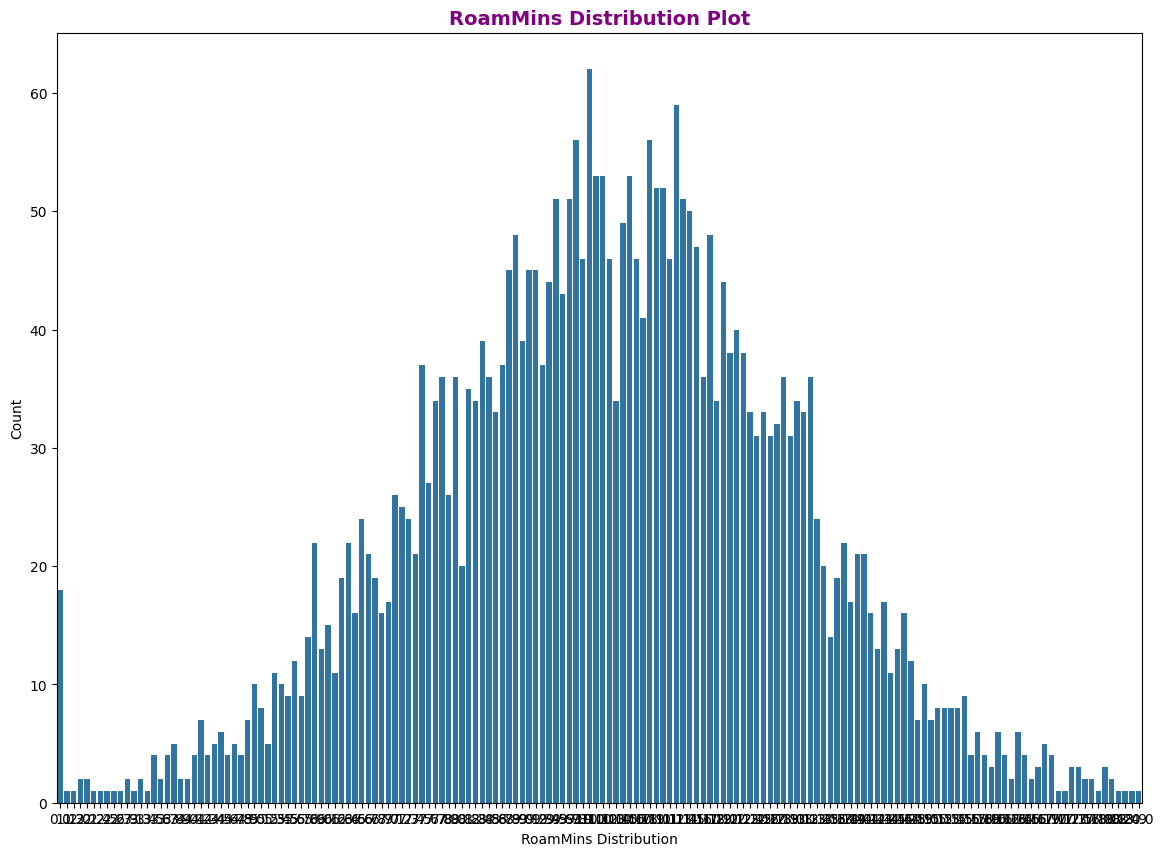

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='RoamMins', data=churn_modelling)
plt.xlabel('RoamMins Distribution')
plt.ylabel('Count')
plt.title('RoamMins Distribution Plot',fontsize=14, fontweight="bold", color = "purple")
plt.show()

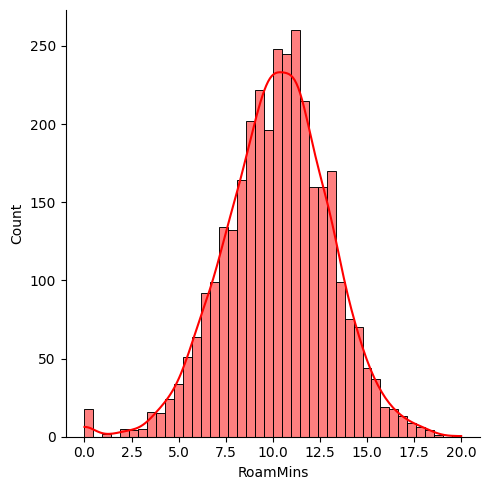

In [ ]:
sns.displot(churn_modelling.RoamMins, kde =True, color = "red")

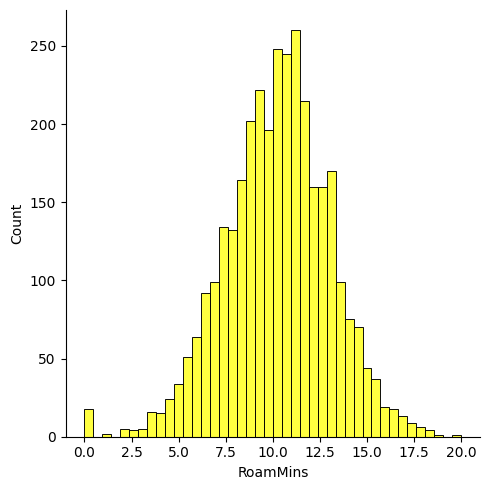

In [ ]:
sns.displot(churn_modelling.RoamMins, color = "yellow")

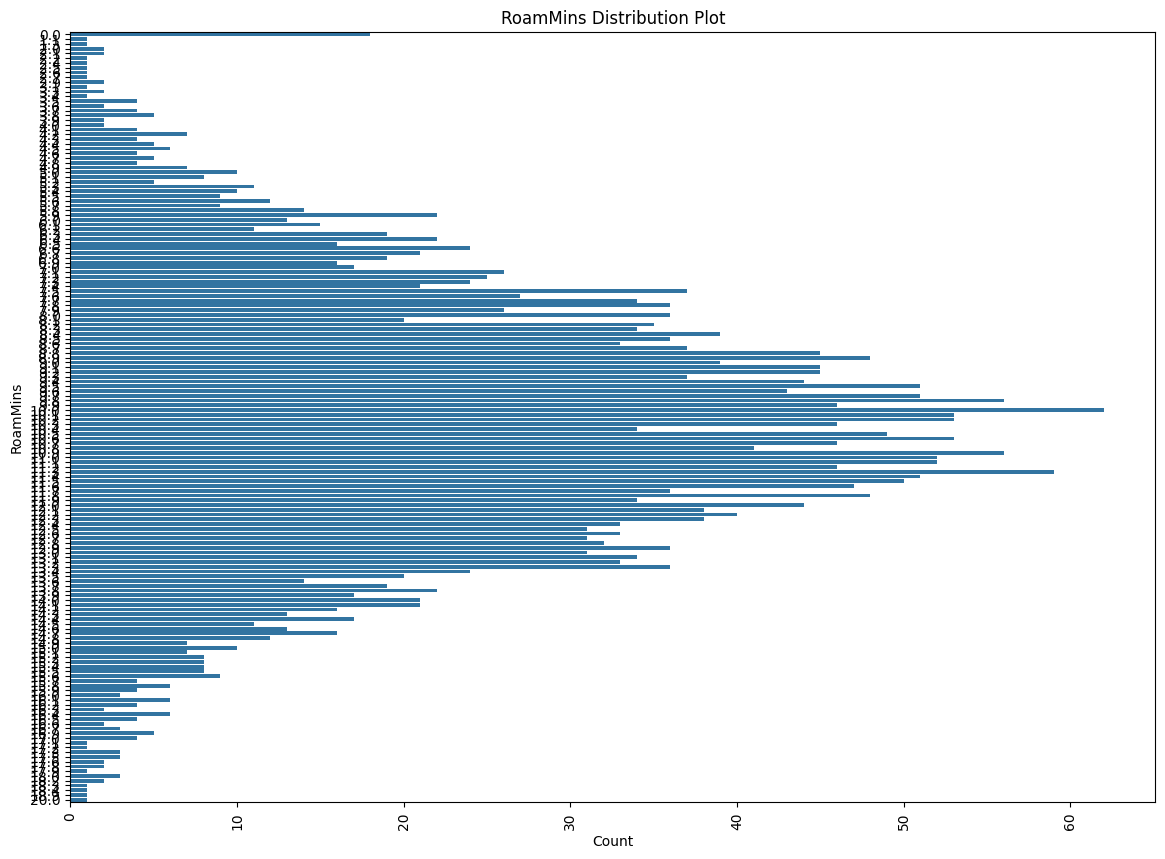

In [ ]:
plt.figure(figsize = (14,10))
count1 = churn_modelling.RoamMins.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('RoamMins')
plt.title('RoamMins Distribution Plot')
plt.xticks(rotation=90)
plt.show()

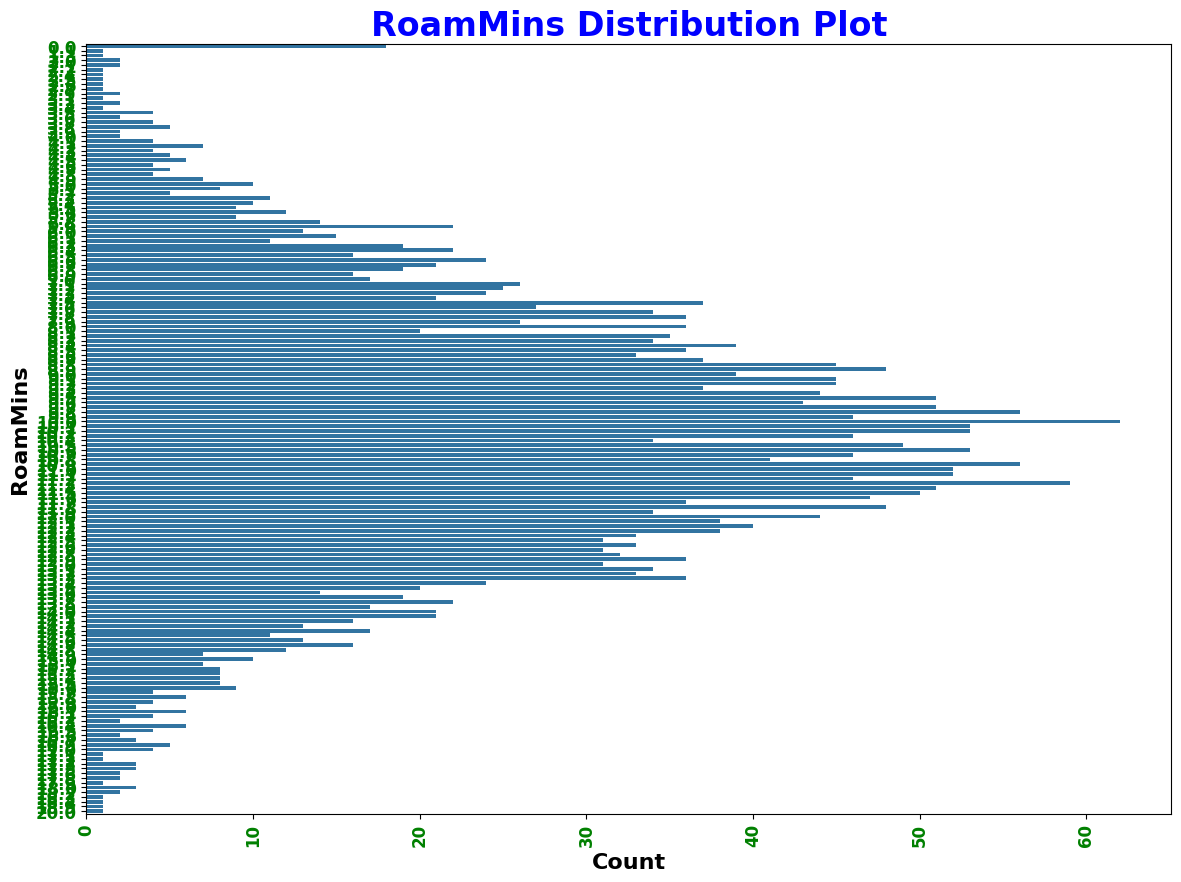

In [ ]:
plt.figure(figsize = (14,10))
count1 = churn_modelling.RoamMins.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('RoamMins', fontsize = 16, fontweight = 'bold')
plt.title('RoamMins Distribution Plot', fontsize = 24, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
plt.show()

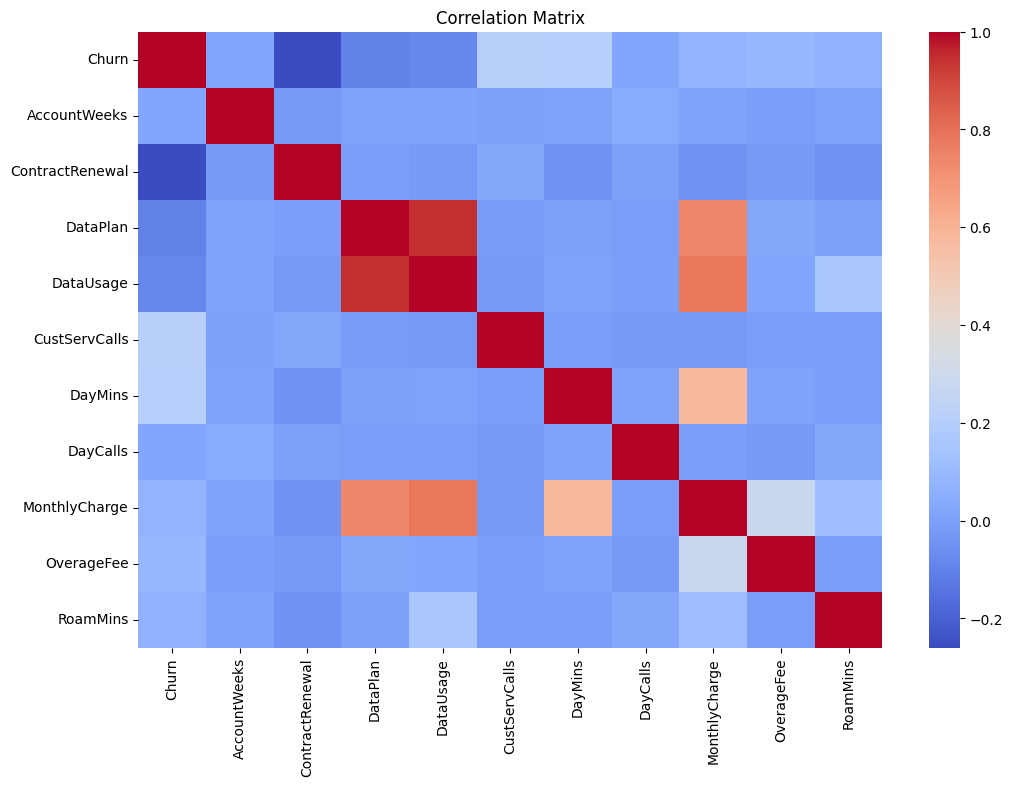

In [ ]:
correlation_matrix = churn_modelling.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,  fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Preprocess the Data

In [ ]:
churn_modelling.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
churn_modelling.drop(labels = ["AccountWeeks","DataPlan","DataUsage"], axis=1, inplace=True)

In [ ]:
churn_modelling = pd.get_dummies(churn_modelling, drop_first= True)

In [ ]:
churn_modelling.head()

,Churn,ContractRenewal,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,1,1,265.1,110,89.0,9.87,10.0
1,0,1,1,161.6,123,82.0,9.78,13.7
2,0,1,0,243.4,114,52.0,6.06,12.2
3,0,0,2,299.4,71,57.0,3.10,6.6
4,0,0,3,166.7,113,41.0,7.42,10.1


In [ ]:
X = churn_modelling.drop(labels = "Churn", axis = 1)
y = churn_modelling["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

train logistic regression model

In [ ]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_predictions = linear_model.predict(X_test)

In [ ]:
print("logistic regression model")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print(accuracy_score(y_test, lr_predictions))
print("r2_score:",r2_score(y_test,lr_predictions))
print("precision_score:",precision_score(y_test,lr_predictions))
print("recall_score:",recall_score(y_test,lr_predictions))
print("f1_score: ", f1_score(y_test,lr_predictions))

logistic regression model
[[554  12]
 [ 82  19]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.61      0.19      0.29       101

    accuracy                           0.86       667
   macro avg       0.74      0.58      0.60       667
weighted avg       0.83      0.86      0.83       667

0.8590704647676162
r2_score: -0.09677080782283198
precision_score: 0.6129032258064516
recall_score: 0.18811881188118812
f1_score:  0.2878787878787879


Train random forest model

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
print("Random Forest Model")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(accuracy_score(y_test, rf_predictions))
print("r2_score: ", r2_score(y_test, rf_predictions))
print("precision_score: ", precision_score(y_test, rf_predictions))
print("recall_score: ", recall_score(y_test, rf_predictions))
print("f1_score: ", f1_score(y_test, rf_predictions))

Random Forest Model
[[556  10]
 [ 40  61]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.60      0.71       101

    accuracy                           0.93       667
   macro avg       0.90      0.79      0.83       667
weighted avg       0.92      0.93      0.92       667

0.9250374812593704
r2_score:  0.4166112724346639
precision_score:  0.8591549295774648
recall_score:  0.6039603960396039
f1_score:  0.7093023255813954


Train gradient boosting model

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_predictions = gb_model.predict(X_test)

In [ ]:
print("Gradient Boosting Model")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print(accuracy_score(y_test, gb_predictions))
print("r2_score: ", r2_score(y_test, gb_predictions))
print("precision_score: ", precision_score(y_test, gb_predictions))
print("recall_score: ", recall_score(y_test, gb_predictions))
print("f1_score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model
[[557   9]
 [ 38  63]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.62      0.73       101

    accuracy                           0.93       667
   macro avg       0.91      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667

0.9295352323838081
r2_score:  0.451614596088584
precision_score:  0.875
recall_score:  0.6237623762376238
f1_score:  0.7283236994219653
